


# Artigo Alocação Ótima
**Autor** Sílvio Ferreira Gomes Júnior
---


-----------------------------------------------------------------

In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [ ]:
import pandas as pd
import numpy as np
import gc
import itertools
from __future__ import print_function
from ortools.linear_solver import pywraplp

In [ ]:
path = 'https://raw.githubusercontent.com/rmf87-unb/ppca-aed-artigo/refs/heads/main/fase%20I/dados_algoritmo2.txt'

dados = pd.read_csv(path, sep=';',decimal=',',encoding='UTF-8')

In [ ]:
dados.head()

,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM
0,1,3586,1.0,666.52
1,1,3587,1.0,666.52
2,1,3588,1.0,666.52
3,1,3589,1.0,666.52
4,1,3590,1.0,666.52


In [ ]:
dados.shape

(1513281, 4)

In [ ]:
cargo_qtd = dados.groupby('IDENTIFICADOR')['CARGO'].count().reset_index()

In [ ]:
cargo_qtd

,IDENTIFICADOR,CARGO
0,1,4849
1,2,4845
2,3,4840
3,4,4840
4,5,4840
...,...,...
312,313,4840
313,314,4840
314,315,4840
315,316,4296


In [ ]:
cargo_qtd['CARGO'].describe()

,CARGO
count,317.000000
mean,4773.757098
std,420.754755
min,5.000000
25%,4840.000000
50%,4840.000000
75%,4840.000000
max,9680.000000


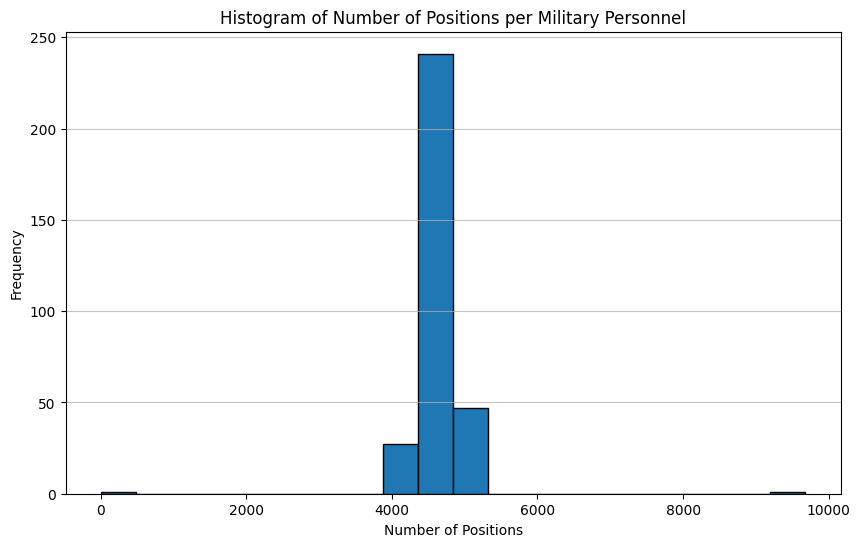

In [ ]:
# prompt: crie um histograma para a variável cargo_qtd['CARGO']

import matplotlib.pyplot as plt

# Assuming 'cargo_qtd' DataFrame is already loaded as in your provided code.

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(cargo_qtd['CARGO'], bins=20, edgecolor='black') # You can adjust the number of bins
plt.title('Histogram of Number of Positions per Military Personnel')
plt.xlabel('Number of Positions')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Deixando somente os militares que tinham à disposição 4840 cargos:

In [ ]:
idt = cargo_qtd[(cargo_qtd['CARGO']==4840)]['IDENTIFICADOR']

In [ ]:
idt

,IDENTIFICADOR
2,3
3,4
4,5
7,8
8,9
...,...
311,312
312,313
313,314
314,315


In [ ]:
#dados filtrado

dados2 = dados[dados['IDENTIFICADOR'].isin(idt)]



In [ ]:
dados2['CARGO'].value_counts()

,count
CARGO,
2087,220
2925,220
2923,220
2922,220
2921,220
...,...
1283,220
1282,220
1281,220


Como podemos verificar na tabela acima, quando selecionamos somente militares com a quantidade supracitada de cargos, a base acaba ficando com somente 220 militares. O código abaixo serve para conferir se todos os militares possuem os mesmos codigos de cargos possíveis.

In [ ]:
igual=0
diferente=0

for cargo in dados2['CARGO'].unique():
  if dados2[dados2['CARGO'] == cargo].shape[0] > 220:
    diferente+=1
  else:
    igual=igual+1

print(f'igual: {igual}')
print(f'diferente: {diferente}')

igual: 4840
diferente: 0


De forma a ajustar os índices dos identificadores dos militares e cargos, decidiu-se por renomeá-los para ficar mais fácil, ao final, a identificação da atribuição.

In [ ]:
dados2 = dados2.sort_values(by=['CARGO', 'IDENTIFICADOR'], ascending=[True, True])

In [ ]:
count = 0
count_list = []


current_cargo = None
for index, row in dados2.iterrows():
    if row['CARGO'] != current_cargo:
        count = 0
        current_cargo = row['CARGO']
    count_list.append(count)
    count += 1


dados2['IDENTIFICADOR2'] = count_list


dados2


,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2
10235,3,1,0.65957,3415.07,0
17802,4,1,0.42553,1758.24,1
20865,5,1,0.65957,801.75,2
37498,8,1,0.97872,1604.70,3
38200,9,1,0.87234,754.90,4
...,...,...,...,...,...
1484881,312,5219,0.87234,940.81,215
1494315,313,5219,0.74468,940.81,216
1494652,314,5219,0.51064,1306.77,217
1504011,315,5219,0.19149,711.04,218


In [ ]:
dados2 = dados2.sort_values(by=['IDENTIFICADOR2', 'CARGO'], ascending=[True, True])

In [ ]:
dados2

,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2
10235,3,1,0.65957,3415.07,0
10236,3,2,0.65957,3415.07,0
10237,3,3,0.65957,3415.07,0
10238,3,4,0.65957,3415.07,0
10239,3,5,0.65957,3415.07,0
...,...,...,...,...,...
1513133,317,5215,0.46809,711.04,219
1513134,317,5216,0.46809,711.04,219
1513135,317,5217,0.46809,711.04,219
1513136,317,5218,0.46809,711.04,219


In [ ]:
count = 0
count_list = []


current_cargo = None
for index, row in dados2.iterrows():
    if row['IDENTIFICADOR2'] != current_cargo:
        count = 0
        current_cargo = row['IDENTIFICADOR2']
    count_list.append(count)
    count += 1


dados2['CARGO2'] = count_list


dados2

,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2,CARGO2
10235,3,1,0.65957,3415.07,0,0
10236,3,2,0.65957,3415.07,0,1
10237,3,3,0.65957,3415.07,0,2
10238,3,4,0.65957,3415.07,0,3
10239,3,5,0.65957,3415.07,0,4
...,...,...,...,...,...,...
1513133,317,5215,0.46809,711.04,219,4835
1513134,317,5216,0.46809,711.04,219,4836
1513135,317,5217,0.46809,711.04,219,4837
1513136,317,5218,0.46809,711.04,219,4838


Diminuindo pela metade o número de cargos para facilitar a execução do algorítmo:

In [ ]:
dados2 = dados2[dados2['CARGO2'] % 2 == 0].copy()
dados2


,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2,CARGO2
10235,3,1,0.65957,3415.07,0,0
10237,3,3,0.65957,3415.07,0,2
10239,3,5,0.65957,3415.07,0,4
10241,3,7,0.65957,3415.07,0,6
10243,3,9,0.65957,3415.07,0,8
...,...,...,...,...,...,...
1513128,317,5210,0.46809,711.04,219,4830
1513130,317,5212,0.46809,711.04,219,4832
1513132,317,5214,0.46809,711.04,219,4834
1513134,317,5216,0.46809,711.04,219,4836


In [ ]:
#reajustando a base ()


dados2 = dados2.sort_values(by=['IDENTIFICADOR2', 'CARGO2'], ascending=[True, True])


In [ ]:
ount = 0
count_list = []


current_cargo = None
for index, row in dados2.iterrows():
    if row['IDENTIFICADOR2'] != current_cargo:
        count = 0
        current_cargo = row['IDENTIFICADOR2']
    count_list.append(count)
    count += 1


dados2['CARGO3'] = count_list


dados2

,IDENTIFICADOR,CARGO,PERCENT_PRI,DISTANCE_KM,IDENTIFICADOR2,CARGO2,CARGO3
10235,3,1,0.65957,3415.07,0,0,0
10237,3,3,0.65957,3415.07,0,2,1
10239,3,5,0.65957,3415.07,0,4,2
10241,3,7,0.65957,3415.07,0,6,3
10243,3,9,0.65957,3415.07,0,8,4
...,...,...,...,...,...,...,...
1513128,317,5210,0.46809,711.04,219,4830,2415
1513130,317,5212,0.46809,711.04,219,4832,2416
1513132,317,5214,0.46809,711.04,219,4834,2417
1513134,317,5216,0.46809,711.04,219,4836,2418


In [ ]:
dados3 = dados2[['IDENTIFICADOR','CARGO','IDENTIFICADOR2','CARGO3','PERCENT_PRI','DISTANCE_KM']]

In [ ]:
#ajustando a escala da variável DISTANCE_KM para que varie de 0 a 1

dados3['DISTANCE_KM2'] = (dados3['DISTANCE_KM'] / dados3['DISTANCE_KM'].max())

In [ ]:
dados3['DISTANCE_KM'].max()

3958.78

A próxima etapa é escolher quais serão os pesos para cada variável, ou seja, se o índice de satisfação do militar (`PERCENT_PRI`) deve ser considerado com o mesmo peso (ou não) do índice de despesa que será baseado na distância entre os cargos/cidades  (`DISTANCE_KM2`). Se considerarmos que ambos os índices possuem a mesma importância, os pesos serão iguais a 0,5. Caso haja limitação de orçamento, talvez seja necessário considerar o aumento no peso para `DISTANCE_KM2`.

No caso deste trabalho, trabalharemos com pesos iguais.

In [ ]:
#ajustando os pesos para PERCENT_PRI E DISTANCE_KM para que vire somente 1 variável

a=0.5
b=0.5

dados3['valor_ref'] = a*dados3['PERCENT_PRI'] + b*dados3['DISTANCE_KM2']

dados3

,IDENTIFICADOR,CARGO,IDENTIFICADOR2,CARGO3,PERCENT_PRI,DISTANCE_KM,DISTANCE_KM2,valor_ref
10235,3,1,0,0,0.65957,3415.07,0.862657,0.761114
10237,3,3,0,1,0.65957,3415.07,0.862657,0.761114
10239,3,5,0,2,0.65957,3415.07,0.862657,0.761114
10241,3,7,0,3,0.65957,3415.07,0.862657,0.761114
10243,3,9,0,4,0.65957,3415.07,0.862657,0.761114
...,...,...,...,...,...,...,...,...
1513128,317,5210,219,2415,0.46809,711.04,0.179611,0.323850
1513130,317,5212,219,2416,0.46809,711.04,0.179611,0.323850
1513132,317,5214,219,2417,0.46809,711.04,0.179611,0.323850
1513134,317,5216,219,2418,0.46809,711.04,0.179611,0.323850


#3 - Modelagem e otimização
<a id="cap3"></a>

Agora partiremos para a modelagem do problema. Consideraremos que o número de militares $n$ é igual ao número de cargos $m$, ou seja, $n=m$.

1. Definição do conjunto de decisão:

Seja $x_{ij}$ uma variável binária que assume valor 1 se o  militar $i$ ocupa o cargo $j$ e 0 caso contrário, ou seja $x_{ij} \in \{0,1\}$.

2. Função objetivo:

Dada uma matriz de custos $C$, onde $c_{ij}$ representa o custo para alocar o militar $i$ no cargo $j$, o objetivo é minimizar o custo total de alocação dos militares, ou seja:

$$min \sum_{i}\sum_{j} c_{ij} x_{ij}$$

3. Restrições:

Somente um militar pode ocupar no máximo um cargo, ou seja,

$$\sum_{j} x_{ij} \le 1 \forall i$$

De forma semelhante, um cargo só pode ser ocupado por no máximo um militar, ou seja,

$$\sum_{i} x_{ij} \le 1 \forall j$$

Como, no caso em questão, temos mais cargos que militares para preencher e decidimos, a priori, que $n=m$, criaremos militares fictícios e atribuiremos o pior custo (valor_ref=1) para que estes sejam alocados em cargos que não foram escolhidos pelos militares reais. Ao final, se um identificador que não existe for alocado em um cargo, quer dizer que esse cargo ficará vazio.

In [ ]:

# Supondo que você já tenha o DataFrame dados3 definido
max_cargo = dados3['CARGO3'].max()

i_values = range(220, 2420)
j_values = range(0, max_cargo + 1)

# Gera o produto cartesiano (todas as combinações de i e j)
cartesian_product = pd.DataFrame(
    itertools.product(i_values, j_values),
    columns=['IDENTIFICADOR2', 'CARGO3']
)

# Define as demais colunas fixas
cartesian_product['PERCENT_PRI'] = 1
cartesian_product['DISTANCE_KM']  = 3958.78
cartesian_product['DISTANCE_KM2'] = 1
cartesian_product['valor_ref']    = 1

cartesian_product

,IDENTIFICADOR2,CARGO3,PERCENT_PRI,DISTANCE_KM,DISTANCE_KM2,valor_ref
0,220,0,1,3958.78,1,1
1,220,1,1,3958.78,1,1
2,220,2,1,3958.78,1,1
3,220,3,1,3958.78,1,1
4,220,4,1,3958.78,1,1
...,...,...,...,...,...,...
5323995,2419,2415,1,3958.78,1,1
5323996,2419,2416,1,3958.78,1,1
5323997,2419,2417,1,3958.78,1,1
5323998,2419,2418,1,3958.78,1,1


Verificando se a quantidade criada de militares fictícios está correta:

In [ ]:
#verificando as quantidades
unique_counts = cartesian_product.groupby('IDENTIFICADOR2')['CARGO3'].nunique()
unique_counts.describe()


,CARGO3
count,2200.0
mean,2420.0
std,0.0
min,2420.0
25%,2420.0
50%,2420.0
75%,2420.0
max,2420.0


In [ ]:
dados3.shape

(532400, 6)

In [ ]:
# Concatena com o DataFrame original
dados3 = pd.concat([dados3, cartesian_product], ignore_index=True)

Após concatenar as bases, temos de verificar se a quantidade final de cargos e militares estão iguais:

In [ ]:
dados4 = dados3[['IDENTIFICADOR2','CARGO3','valor_ref']].copy()

In [ ]:
dados4

,IDENTIFICADOR2,CARGO3,valor_ref
0,0,0,0.761114
1,0,1,0.761114
2,0,2,0.761114
3,0,3,0.761114
4,0,4,0.761114
...,...,...,...
5856395,2419,2415,1.000000
5856396,2419,2416,1.000000
5856397,2419,2417,1.000000
5856398,2419,2418,1.000000


Agora que a base de dados está pronta para ser utilizada, vamos preparar o algoritmo e executá-lo:

In [ ]:
#tamanho da matriz
N = dados4['IDENTIFICADOR2'].max() + 1


n_linhas = dados4['IDENTIFICADOR2'].max() + 1
n_colunas = dados4['CARGO3'].max() + 1

#definindo a matriz de custos
matriz = np.zeros((n_linhas, n_colunas), dtype=dados4['valor_ref'].dtype)

#preenchendo a matriz de custos
matriz[dados4['IDENTIFICADOR2'].values, dados4['CARGO3'].values] = dados4['valor_ref'].values



In [ ]:
matriz.shape

(2420, 2420)

In [ ]:

def max_alocacao(matriz,tamanho):


    num_tasks = len(matriz[0])


    solver4 = pywraplp.Solver('alocacao',
                             pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

    # Cria variáveis binárias x[i][j]: se 1, funcionário i é alocado à tarefa j
    x = []
    for i in range(tamanho):
        row = []
        for j in range(num_tasks):
            # IntVar(0, 1, nome_da_variavel) => variável binária
            var = solver4.IntVar(0, 1, f'x_{i}_{j}')
            row.append(var)
        x.append(row)

    # Restrição 1 (cada funcionário em no máximo 1 tarefa ou exatamente 1):
    for i in range(tamanho):
      solver4.Add(sum(x[i][j] for j in range(num_tasks)) == 1)

    for j in range(num_tasks):
      solver4.Add(sum(x[i][j] for i in range(tamanho)) == 1)

    objective = solver4.Objective()
    for i in range(tamanho):
        for j in range(num_tasks):
            objective.SetCoefficient(x[i][j], matriz[i][j])
    objective.SetMinimization()

    # Resolver
    status = solver4.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solucao:")
        print(f"Valor objetivo = {round(objective.Value(),1)}")

        solucoes = []

    for i in range(tamanho):
          for j in range(num_tasks):
              # Se x[i][j] = 1, significa que houve alocação
              if x[i][j].solution_value() > 0.5:  # ou == 1.0
                  solucoes.append({
                      "Militar": i,
                      "Cargo": j,
                      "Valor": x[i][j].solution_value()
                  })

        # Converter para DataFrame
    return pd.DataFrame(solucoes)

resultado2=max_alocacao(matriz,N)

#4 - Resultados
<a id="cap4"></a>

Retirando os militares criados artificialmente:

In [ ]:
resultado3=resultado2[resultado2['Militar']<220]

In [ ]:
resultado3.sort_values(by=['Militar'], ascending=[True],inplace=True)

Dessa forma, conforme os resultados abaixo, os militares a seguir seriam alocados nos seguintes cargos:

In [ ]:
resultado3=resultado3[['Militar','Cargo']]
mil_carg=dados3[['IDENTIFICADOR','CARGO','IDENTIFICADOR2','CARGO3']]

resultado_final=pd.merge(resultado3,mil_carg,how='inner',left_on=['Militar','Cargo'],right_on=['IDENTIFICADOR2','CARGO3'])
resultado_final=resultado_final[['IDENTIFICADOR','CARGO']]
resultado_final.sort_values(by=['IDENTIFICADOR'], ascending=[True],inplace=True)


In [ ]:
resultado_final.head(10)

,IDENTIFICADOR,CARGO
0,3,2135
1,4,853
2,5,1993
3,8,2311
4,9,2063
5,11,4450
6,13,1865
7,15,2516
8,16,1181
9,17,4466


Podemos salvar o resultado em um arquivo .csv com o código abaixo:

In [ ]:
resultado_final.to_csv('resultado2.csv', index=False,sep=';',decimal=',')

Para facilitar a visualização da alocação dos primeiros 20 militares, podemos utilizar o diagrama de Sankey:

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Carregar o CSV (ajuste o caminho conforme necessário)
df = pd.read_csv("resultado_final2.csv", sep=';', encoding='utf-8')
df = df.head(20)

# Ordenar o DataFrame de acordo com o IDENTIFICADOR para que a origem fique em ordem crescente
df = df.sort_values(by="IDENTIFICADOR")

# Listas únicas de origem e destino
unique_sources = df["IDENTIFICADOR"].unique().tolist()
unique_targets = df["CARGO"].unique().tolist()

# Cria uma lista única de todos os nós (origens + destinos)
all_nodes = unique_sources + unique_targets

# Cria dicionários para mapear cada valor em seu índice no diagrama
node_indices = {node: i for i, node in enumerate(all_nodes)}

# Construir as listas de links (source e target) para o diagrama
source_indices = []
target_indices = []
value_list = []

# Preenche os dados para cada linha do DataFrame
for _, row in df.iterrows():
    src = row["IDENTIFICADOR"]
    tgt = row["CARGO"]
    source_indices.append(node_indices[src])
    target_indices.append(node_indices[tgt])
    value_list.append(1)  # Cada linha representa 1 movimentação

# Configurar o diagrama de Sankey
sankey_data = go.Sankey(
    node = dict(
        pad = 20,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = all_nodes  # Nome dos nós
    ),
    link = dict(
        source = source_indices,
        target = target_indices,
        value = value_list
    )
)

# Criar a figura
fig = go.Figure(data=[sankey_data])

# Layout opcional para título, largura, etc.
fig.update_layout(
    title=dict(
        text="Movimentação de Militares: IDENTIFICADOR → CARGO",
        font=dict(size=24)  # Aumente ou diminua conforme desejar
    ),
    margin=dict(l=80, r=80, t=80, b=100)
)

fig.add_annotation(
    x=0.14,             # posição horizontal (50% do espaço)
    y=-0.1,            # posição vertical (negativo, para ficar abaixo do eixo principal)
    xref="paper",
    yref="paper",
    text="*O diagrama apresenta somente os primeiros 25/220 militares.",
    showarrow=False,   # oculta seta da anotação
    xanchor="center",
    yanchor="top",
    font=dict(size=12)
)

# Exibir o diagrama
fig.show()

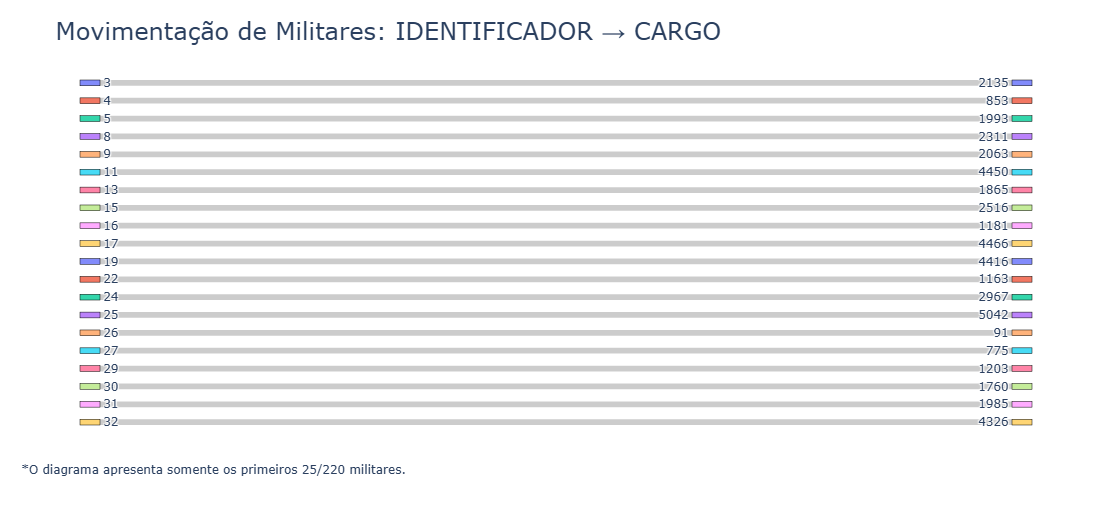

#5 - Conclusão
<a id="cap5"></a>

A movimentação de militares pelo Brasil é essencial para a garantia da defesa do território nacional. A vivência nacional, por parte dos oficiais, e regional, por parte das praças, permite que se obtenha informações sobre o terreno, garantindo os conhecimentos necessários para a realização de operações militares. Para tanto, as Forças Armadas necessitam de recursos suficientes para realizar as movimentações de seus militares.

Ademais, a Força considera os anseios da Família Militar para manter o militar motivado e feliz, porque acredita que a valorização dos recursos humanos é capaz de aumentar a capacidade do Exército para cumprir suas missões.

A análise de múltiplas dimensões – orçamento e satisfação – revela como o uso de ferramentas de Pesquisa Operacional pode promover decisões mais equilibradas e eficientes. Além disso, ao contemplar as necessidades individuais dos militares e as limitações orçamentárias, a metodologia proposta mostra-se promissora para a otimização do controle de efetivos, podendo servir de modelo para futuras aplicações em diferentes contextos dentro das Forças Armadas.

Assim, espera-se que este trabalho contribua não apenas para o aperfeiçoamento dos processos de movimentação e alocação, mas também para o fortalecimento das capacidades do Exército Brasileiro, ao harmonizar metas estratégicas com a valorização dos recursos humanos.